## Modelo de Árvore de Decisão

Nesse arquivo vamos trabalhar o modelo de árvore de decisão, se baseando nos dados vistos na pasta 'data'

---

### Importando bibliotecas

In [2]:
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

### Criando dataset

In [20]:
df = pd.read_csv("./data/heart_attack_prediction_dataset.csv", sep=',')
df['systolic'] = df['Blood Pressure'].str.split('/').str[0]
df['diastolic'] = df['Blood Pressure'].str.split('/').str[1]
df = df.drop(columns=['Patient ID', 'Sex', 'Heart Rate', 'Diabetes'
                      , 'Previous Heart Problems','Medication Use','Stress Level', 
                      'Sedentary Hours Per Day', 'Blood Pressure', 
                      'Country', 'Continent', 'Hemisphere',
                      'Income', 'BMI', 'Triglycerides'])
Columns = ['Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Heart Attack Risk']
df[Columns] = df[Columns].astype(bool)
df['systolic'] = pd.to_numeric(df['systolic']).astype('int64')
df['diastolic'] = pd.to_numeric(df['diastolic']).astype('int64')
df

,Age,Cholesterol,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,systolic,diastolic
0,67,208,False,True,False,False,4.168189,1,0,6,False,158,88
1,21,389,True,True,True,True,1.813242,0,1,7,False,165,93
2,21,324,False,False,False,False,2.078353,2,4,4,False,174,99
3,84,383,True,True,False,True,9.828130,1,3,4,False,163,100
4,66,318,True,True,True,False,5.804299,0,1,5,False,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,True,True,False,True,7.917342,2,7,7,False,94,76
8759,28,120,False,False,True,False,16.558426,2,4,9,False,157,102
8760,47,250,True,True,True,True,3.148438,1,4,4,True,161,75
8761,36,178,False,True,False,False,3.789950,0,2,8,False,119,67


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Family History                   8763 non-null   bool   
 3   Smoking                          8763 non-null   bool   
 4   Obesity                          8763 non-null   bool   
 5   Alcohol Consumption              8763 non-null   bool   
 6   Exercise Hours Per Week          8763 non-null   float64
 7   Diet                             8763 non-null   int64  
 8   Physical Activity Days Per Week  8763 non-null   int64  
 9   Sleep Hours Per Day              8763 non-null   int64  
 10  Heart Attack Risk                8763 non-null   bool   
 11  systolic                         8763 non-null   int64  
 12  diastolic           

### Preparando dados para o modelo

In [22]:
x = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

x.head
y.head

<bound method NDFrame.head of 0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760     True
8761    False
8762     True
Name: Heart Attack Risk, Length: 8763, dtype: bool>

### Separação dos grupos de teste e treino 
A fatia separada para o treino do modelo equivale a 25% da base de dados

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Criação e execução do modelo de árvore de decisão

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

### Analise dos resultados

##### Matriz de confusão

In [30]:
print('\n Matriz de confusão\n', pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins = True, margins_name="Todos"))



 Matriz de confusão
 Predito  False  True  Todos
Real                       
False      884   511   1395
True       506   290    796
Todos     1390   801   2191


##### Métricas

In [32]:
accur = str(round(metrics.accuracy_score(y_test, predictions) * 100, 2))+"%"
print(f"Acurácia: {accur}")
precisao = str(round(metrics.precision_score(y_test, predictions) * 100, 2))+"%"
print(f'Precisão: {precisao}')
revocacao = str(round(metrics.recall_score(y_test, predictions) * 100, 2))+"%"
print(f'Revocação: {revocacao}')
f1 = str(round(metrics.f1_score(y_test, predictions) * 100, 2))+"%"
print(f'F1-Score: {f1}')

Acurácia: 53.58%
Precisão: 36.2%
Revocação: 36.43%
F1-Score: 36.32%


##### Aplicando a curva ROC ao resultados

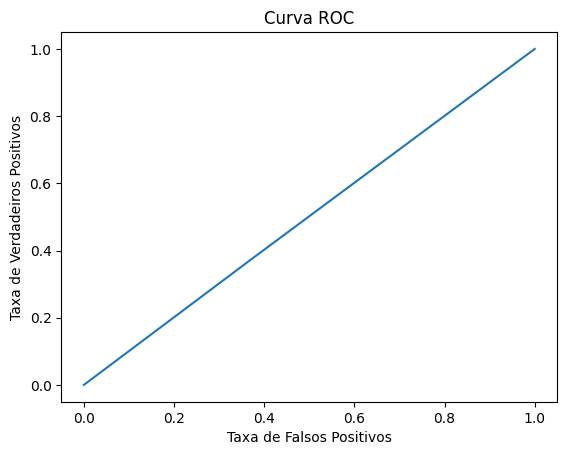

Área sob a Curva ROC (ROC AUC): 0.5012725262976687


In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

roc_auc = metrics.roc_auc_score(y_test, predictions)
print(f'Área sob a Curva ROC (ROC AUC): {roc_auc}')